## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
path = "/content/drive/MyDrive/Almabetter learning/EDA Airbnb/Airbnb NYC 2019.csv"
data_df = pd.read_csv(path)

In [3]:
data_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
data_df.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [6]:
data_df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [7]:
data_df.groupby('neighbourhood_group')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,1091.0,87.496792,106.709349,0.0,45.0,65.0,99.0,2500.0
Brooklyn,20104.0,124.383207,186.873538,0.0,60.0,90.0,150.0,10000.0
Manhattan,21661.0,196.875814,291.383183,0.0,95.0,150.0,220.0,10000.0
Queens,5666.0,99.517649,167.102155,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.812332,277.620403,13.0,50.0,75.0,110.0,5000.0


In [8]:
data_df.pivot_table(index='neighbourhood_group',columns='room_type',values='price',aggfunc='mean')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


Mean Price comparison for diff rooms in diff neighbourhoods



In [9]:
data_df.groupby('neighbourhood_group').agg({'price':['min','max','mean','median','count']})

price                                 
                      min    max        mean median  count
neighbourhood_group                                       
Bronx                   0   2500   87.496792     65   1091
Brooklyn                0  10000  124.383207     90  20104
Manhattan               0  10000  196.875814    150  21661
Queens                 10  10000   99.517649     75   5666
Staten Island          13   5000  114.812332     75    373

In [10]:
BBox = ((data_df.longitude.min(),   data_df.longitude.max()),      
         (data_df.latitude.min(), data_df.latitude.max()))
BBox

((-74.24441999999999, -73.71299), (40.499790000000004, 40.913059999999994))

In [11]:
df=data_df.copy()

In [ ]:
air_bnb_reviews=df[['neighbourhood_group','number_of_reviews']].groupby('neighbourhood_group').sum().reset_index()

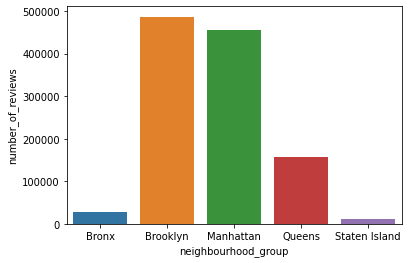

In [ ]:
import seaborn as sns
sns.barplot(data=air_bnb_reviews,x='neighbourhood_group',y='number_of_reviews')

In [ ]:
#import folium
#from folium.plugins import HeatMap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


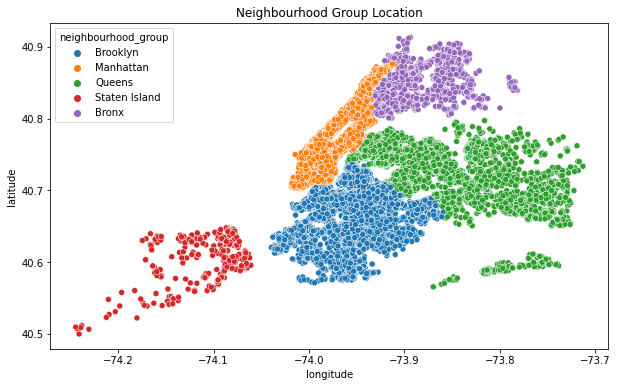

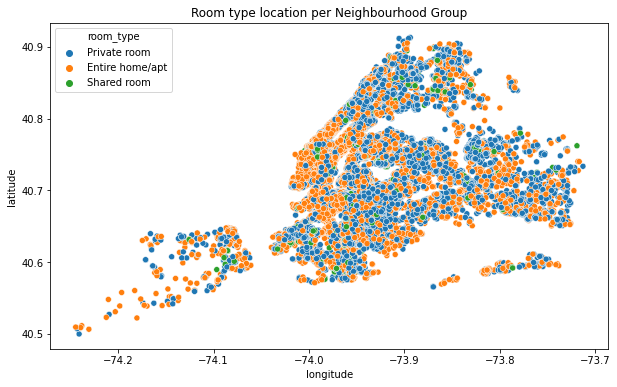

In [ ]:
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude, df.latitude, hue=df.neighbourhood_group).set_title(title)
plt.ioff()

title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude, df.latitude, hue=df.room_type).set_title(title)
plt.ioff()

In [ ]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="room_type",
                        color_discrete_map={'Private room': '#222A2A',  'Entire home/apt': '#2E91E5',  'Shared room': '#FC0080'}
                        , zoom=9, height=700,width =700)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

This map gives a false impresson of high no of shared apartments, if we zoom in further we can see then aparsely distributed giving an illusory of highly dense when we zoom out.

In [ ]:
#import folium
##from folium.plugins import HeatMap

#m=folium.Map([40.7128,-74.0060],zoom_start=11)
#HeatMap(df[['latitude','longitude']].dropna(),radius=5,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
#display(m)

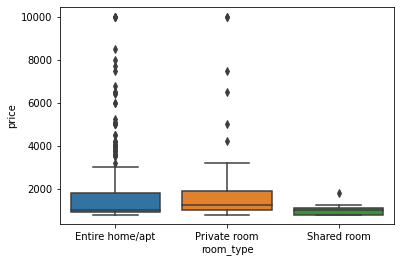

In [ ]:
df[df['price']>=800]['room_type'].value_counts()
#df['price'].quantile(q=0.99)
sns.boxplot(data=df[df['price']>=800],x='room_type',y='price')

## **My Analysis Host and Neighbourhoods**

1. Host listing value counts, we get top 40 , hosts with listings atleast 20
2. Different hosts and areas (Analysed the top hosts to find mainly in which ares there listings are concentrated )
3. In addition to pt 2 we check, mostly which room type have they listed. This may give us an idea of the profitable business(rooms in demand) in diff areas. We may not have an idea about prices from this.
4. We can check the mean, median of prices in diff areas and compare with the mean,median of prices for areas from pt 3(specific to those hosts)
5. Pt 3&4 may propel us to check availability of those rooms. (It gives us an idea whether these hosts are really busy or not)

In [ ]:
import seaborn as sns

In [ ]:
df=data_df.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
a=df['host_id'].nunique()
b=df[df['calculated_host_listings_count']<20]['host_id'].nunique()
print("Count of unique hosts {}".format(a))
print("Count of unique host having listings less than 20 is {}".format(b))
print("Percentage of unique host having listings greater than 20 is {}".format(100*(a-b)/a))

Count of unique hosts 37457
Count of unique host having listings less than 20 is 37417
Percentage of unique host having listings greater than 20 is 0.10678911818885656


In [ ]:
len(df[df['calculated_host_listings_count']<20])/len(df)

0.9540852847939462

Huge number of hosts with few Airbnb listings

In [ ]:
df[df.calculated_host_listings_count<20]['neighbourhood_group'].value_counts()

Manhattan        19833
Brooklyn         19828
Queens            5526
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
df_top_host=df[['host_id','host_name']].value_counts().sort_values(ascending=False).head(40).reset_index().rename(columns={0:'listing_count'})#{'index':'host_id','host_id':'listing_count'})
df_top_host.head()

,host_id,host_name,listing_count
0,219517861,Sonder (NYC),327
1,107434423,Blueground,232
2,30283594,Kara,121
3,137358866,Kazuya,103
4,12243051,Sonder,96


These are the 40 hosts with atleast 20 listings. The top 5 to 10 might be the most busiest.  My analysis would be on these hosts.

In [ ]:
print("Percentage of total data we looking at {}".format(100*df_top_host['listing_count'].sum()/len(df)))
print("Percentage of total host we looking at {}".format(100*len(df_top_host)/df['host_id'].nunique()))

Percentage of total data we looking at 4.591471520605379
Percentage of total host we looking at 0.10678911818885656


This is a small fraction of hosts to analyze. But rest of the hosts have few listings only, this might not help us in giving good analysis or prediction.

In [ ]:
df_top_host_by_neigb=df[df['host_id'].isin(df_top_host.host_id)].groupby(['host_id','neighbourhood_group']).agg({'price':['count','mean','min','max']}).reset_index().sort_values([('price','count')],ascending=[False])

In [ ]:
df_top_host_by_neigb.head()#[('price','count')].sum()

host_id neighbourhood_group price                       
                                  count        mean  min   max
44  219517861           Manhattan   327  253.195719  100   699
30  107434423           Manhattan   230  303.221739  184   481
21   30283594           Manhattan   121  277.528926  109  1170
8    12243051           Manhattan    96  213.031250  125   377
10   16098958           Manhattan    96  208.958333  117   550

In [ ]:
df_top_host_by_neigb.columns=[ i+j for i,j in df_top_host_by_neigb.columns]
df_top_host_by_neigb.columns

Index(['host_id', 'neighbourhood_group', 'pricecount', 'pricemean', 'pricemin',
       'pricemax'],
      dtype='object')

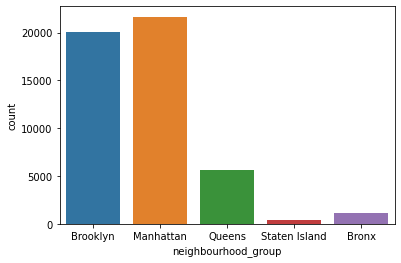

In [ ]:
sns.countplot(data=df,x='neighbourhood_group')

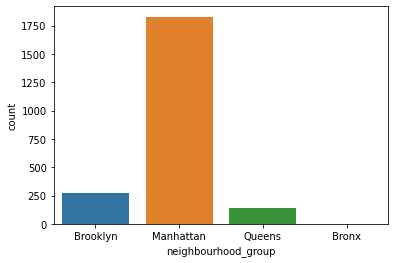

In [ ]:
sns.countplot(data=df[df['host_id'].isin(df_top_host.host_id)],x='neighbourhood_group')

The number of listings in Manhattan and Brooklyn is quite comparable but the top hosts majorly have their listings in Manhattan.

In [ ]:
df.pivot_table(index='neighbourhood_group',columns='room_type',values='host_id',aggfunc='count')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


Manhattan with most listings has almost 2/3rd listings as type Entire home/apt.

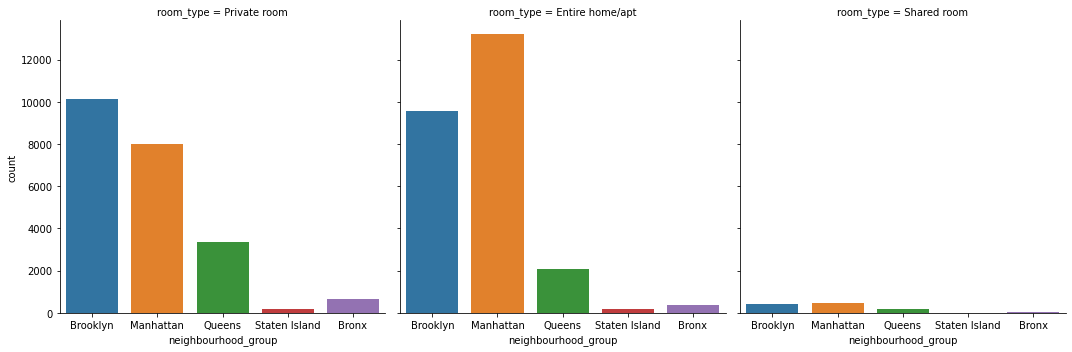

In [ ]:
sns.catplot(data=df,x='neighbourhood_group',kind='count',col='room_type')

From this plot it is evident that "Entir home" type is more popular in Manhattan and this might be the reason why top hosts have most of this type of listings. But interestig thing to note is that in Brooklyn Private rooms are more popular. We can analyse further to find the distribution of room type in Brooklyn.

We can also check whether there is any pattern for room type distribution in top localities in Manhattan 

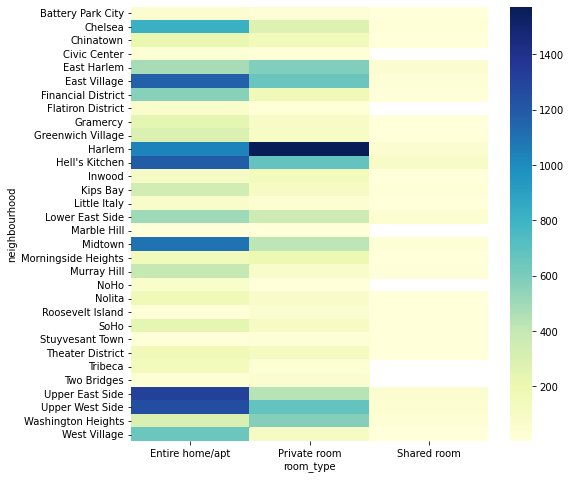

In [ ]:
plt.figure(figsize=(8,8))
manhattan_pivoted_count=df[df.neighbourhood_group=='Manhattan'].pivot_table(index='neighbourhood',columns='room_type',values='host_id',aggfunc='count')
sns.heatmap(manhattan_pivoted_count,cmap='YlGnBu')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(df[df.neighbourhood_group=='Manhattan'], lat="latitude", lon="longitude", color="neighbourhood",
                        color_discrete_sequence=px.colors.qualitative.G10
                        , zoom=11, height=500,width =600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

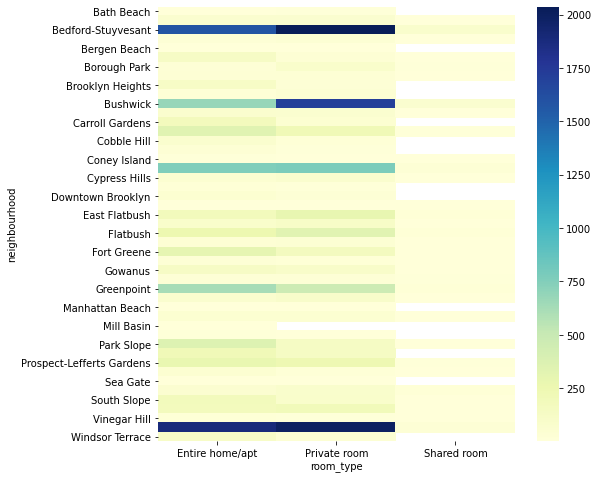

In [ ]:
plt.figure(figsize=(8,8))
brooklyn_pivoted_count=df[df.neighbourhood_group=='Brooklyn'].pivot_table(index='neighbourhood',columns='room_type',values='host_id',aggfunc='count')
sns.heatmap(brooklyn_pivoted_count,cmap='YlGnBu')
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(df[df.neighbourhood_group=='Brooklyn'], lat="latitude", lon="longitude", color="neighbourhood",
                        color_discrete_sequence=px.colors.qualitative.G10
                        , zoom=10, height=500,width =600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
top5_listings_brooklyn_count=pd.DataFrame(df[df.neighbourhood_group=='Brooklyn']['neighbourhood'].value_counts()).head()
#df[df.neighbourhood_group=='Brooklyn']['neighbourhood'].value_counts()
top5_listings_brooklyn_count

,neighbourhood
Williamsburg,3920
Bedford-Stuyvesant,3714
Bushwick,2465
Crown Heights,1564
Greenpoint,1115


In [ ]:
top5_listings_brooklyn=df[(df.neighbourhood_group=='Brooklyn') & (df['neighbourhood'].isin(top5_listings_brooklyn_count.index))]

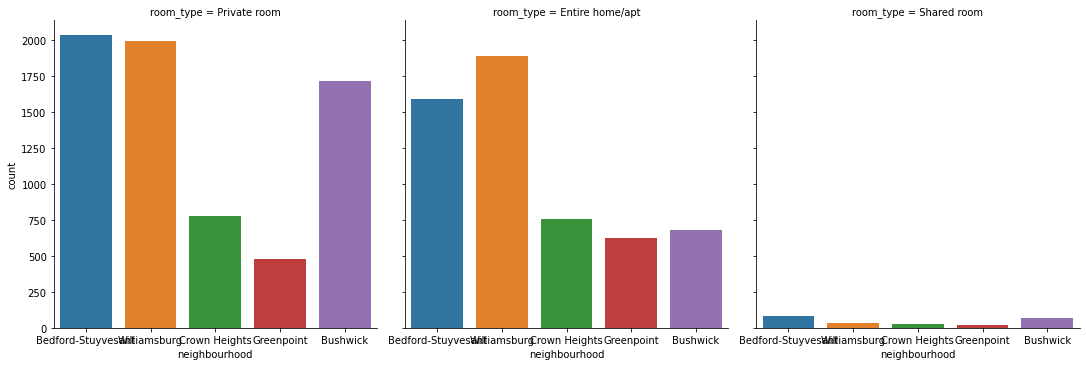

In [ ]:
sns.catplot(data=top5_listings_brooklyn,x='neighbourhood',kind='count',col='room_type')

Count of listings in different neighbourhoods

In [ ]:
df_top_host_prcrnt_dist_locality=df[df['host_id'].isin(df_top_host.host_id)].groupby(['host_id','neighbourhood_group']).agg({'price':['count']}).groupby(level=0).apply(lambda x:round(100 * x / x.sum())).reset_index()
df_top_host_prcrnt_dist_locality.head(5)

,host_id,neighbourhood_group,price
,,,count
0,417504,Brooklyn,100.0
1,1475015,Manhattan,100.0
2,2119276,Manhattan,100.0
3,2856748,Manhattan,100.0
4,3191545,Manhattan,100.0


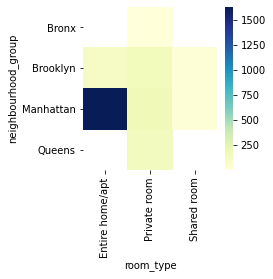

In [ ]:
plt.figure(figsize=(3,3))
top_host_prcrnt_dist_locality=df[df['host_id'].isin(df_top_host.host_id)].pivot_table(index='neighbourhood_group',columns='room_type',values='host_id',aggfunc='count')
sns.heatmap(top_host_prcrnt_dist_locality,cmap='YlGnBu')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The %age wise distribution of listings in diff areas has been plotted for the top hosts.

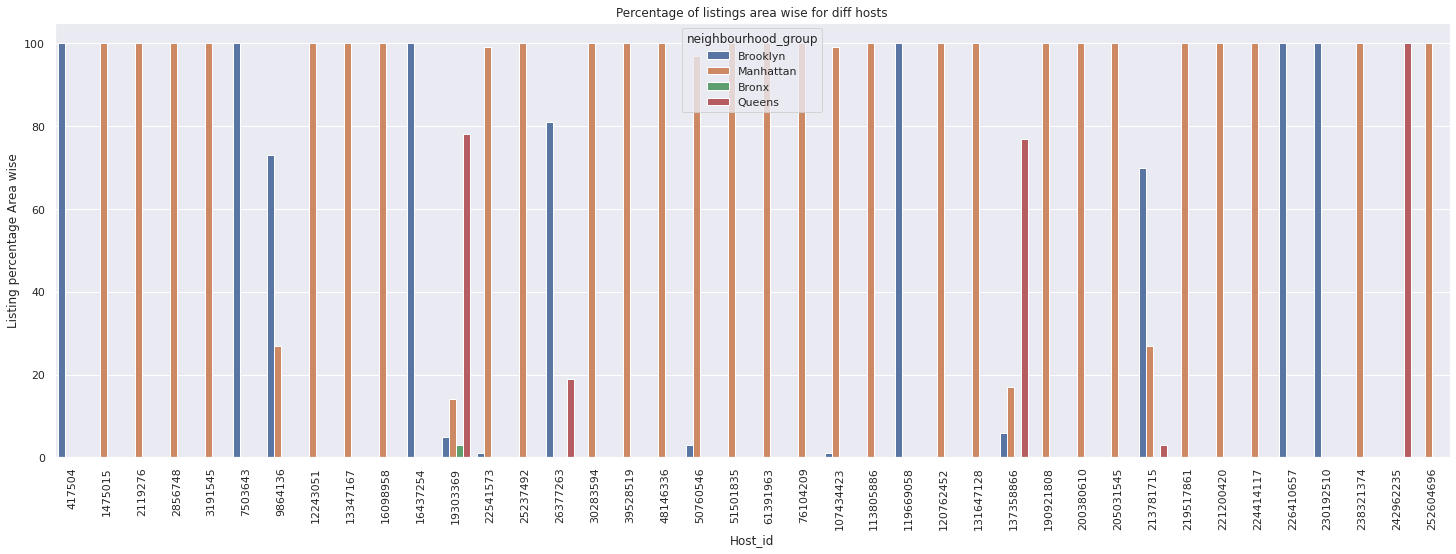

In [ ]:

#plt.figure(figsize=(25,8))
sns.set(rc={'figure.figsize':(25,8)})

top_host_listing_areawise_graph=sns.barplot(x='host_id',y=('price','count'),hue='neighbourhood_group',data=df_top_host_prcrnt_dist_locality)#
top_host_listing_areawise_graph.set_title("Percentage of listings area wise for diff hosts")

#price_graph = sns.barplot(x=price_sorted.index, y=price_sorted.price)
top_host_listing_areawise_graph.set_xticklabels(labels=top_host_listing_areawise_graph.get_xticklabels(), rotation=90);
top_host_listing_areawise_graph.set_xlabel('Host_id');
top_host_listing_areawise_graph.set_ylabel('Listing percentage Area wise');

First finding, We can say that out of  top 40 hosts, most of them have their listings completely in Manhattan. The second in the top list of areas is Brooklyn. (None of them have apartment in Staten Island). We can further analyse about these two areas.

Now, we look at the distribution of room types that these hosts have listed.

In [ ]:
df_top_host_prcrnt_dist_roomtype=df[df['host_id'].isin(df_top_host.host_id)].groupby(['host_id','room_type']).agg({'price':['count']}).reset_index()#.rename(columns={'('price','count')':'Room type counts'})

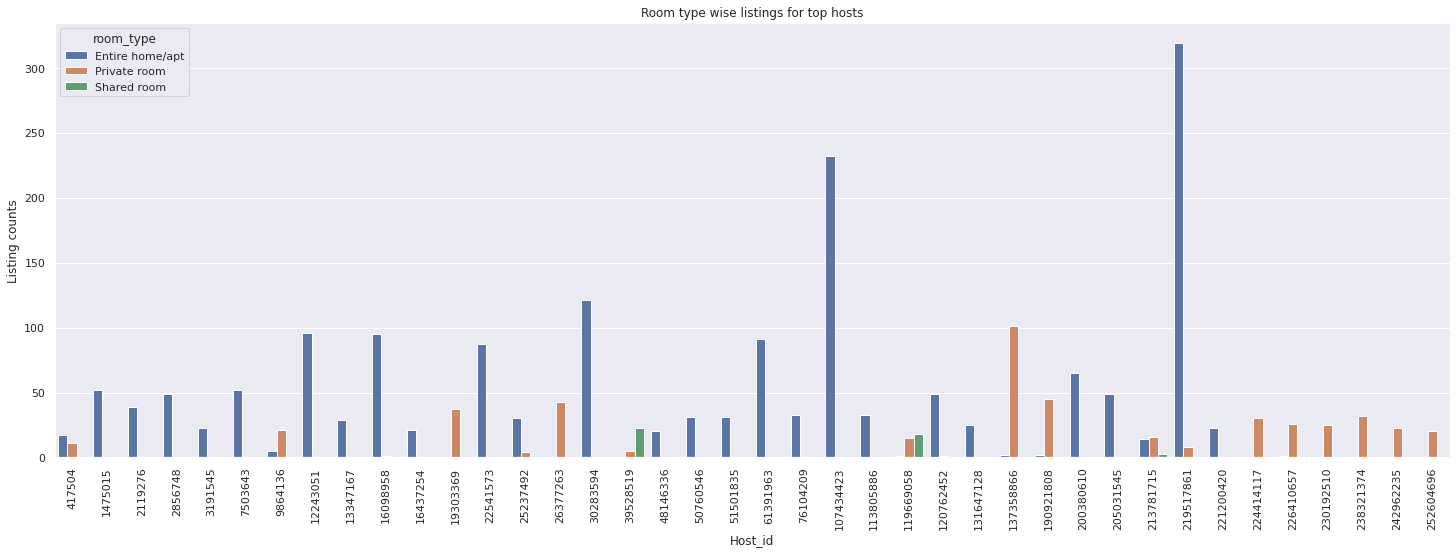

In [ ]:
#plt.figure(figsize=(25,8))
sns.set(rc={'figure.figsize':(25,8)})
top_host_listing_roomtype_graph=sns.barplot(x='host_id',y=('price','count'),hue='room_type',data=df_top_host_prcrnt_dist_roomtype)

top_host_listing_roomtype_graph.set_title("Room type wise listings for top hosts")

#price_graph = sns.barplot(x=price_sorted.index, y=price_sorted.price)
top_host_listing_roomtype_graph.set_xticklabels(labels=top_host_listing_roomtype_graph.get_xticklabels(), rotation=90);
top_host_listing_roomtype_graph.set_xlabel('Host_id');
top_host_listing_roomtype_graph.set_ylabel('Listing counts');

Majority of listings from Top hosts has room type as Entire Home/apt, followed by private rooms.

In [ ]:
df.neighbourhood.value_counts().head(10).index

Index(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick',
       'Upper West Side', 'Hell's Kitchen', 'East Village', 'Upper East Side',
       'Crown Heights', 'Midtown'],
      dtype='object')

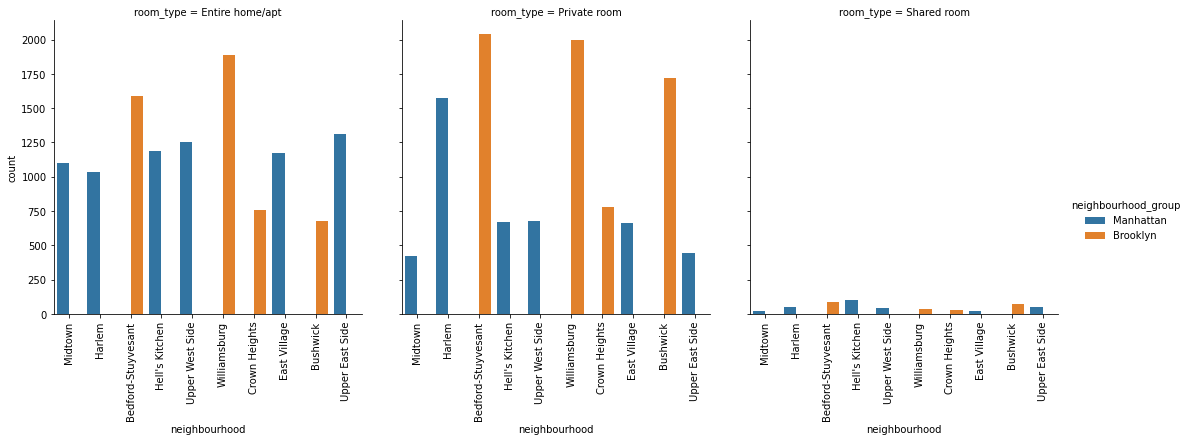

In [ ]:
df_top_neighbourhood=df[df['neighbourhood'].isin(df.neighbourhood.value_counts().head(10).index)]
viz_neighbourhood_room_type = sns.catplot(x='neighbourhood',
                                          hue='neighbourhood_group',
                                          col='room_type',
                                          data=df_top_neighbourhood,
                                          kind='count')
viz_neighbourhood_room_type.set_xticklabels(rotation=90)  

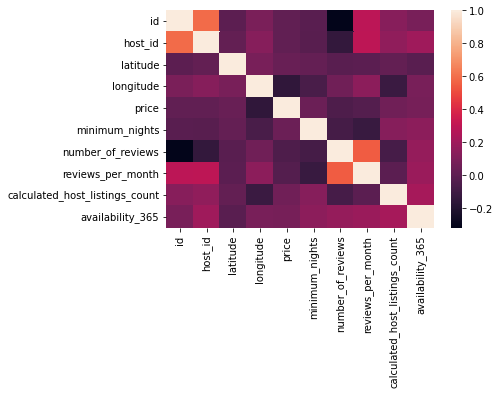

In [15]:
import seaborn as sns
sns.heatmap(df.corr())